In [1]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.17.1
Uninstalling tensorflow-2.17.1:
  Would remove:
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.17.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y
y
y

y
  Successfully uninstalled tensorflow-2.17.1


In [91]:
!pip install tensorflow==2.17.1

In [216]:
import tensorflow as tf
mnist=tf.keras.datasets.mnist

In [175]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [217]:
x_train.shape

(60000, 28, 28)

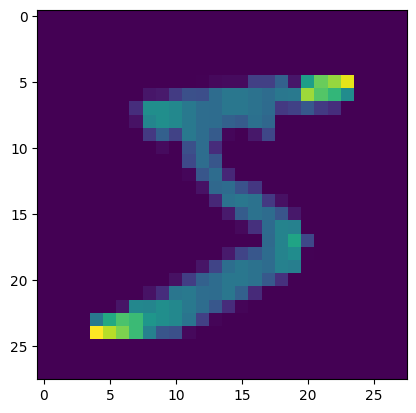

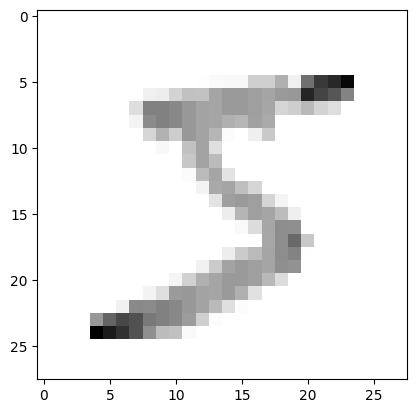

In [218]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [219]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

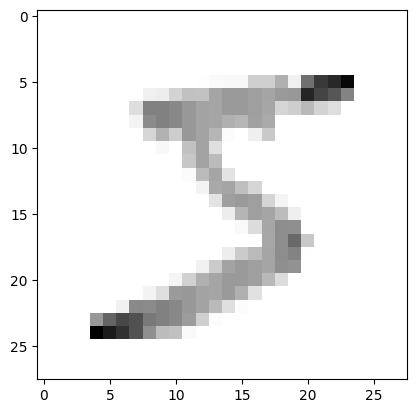

In [220]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

**After Normalization**

In [221]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [222]:
print(y_train[0])

5


In [223]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print("Training Sample dimension",x_trainr.shape)
print("Testing Sample dimension",x_testr.shape)

Training Sample dimension (60000, 28, 28, 1)
Testing Sample dimension (10000, 28, 28, 1)


In [224]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [225]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation('softmax'))

In [226]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_19 (Activation)           │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_20 (Activation)           │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_21 (Activation)           │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_22 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_23 (Activation)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_24 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [227]:
print("Total Training Samples = ",len(x_trainr))

Total Training Samples =  60000


In [228]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

**Training the Model**

In [229]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 76s 56ms/step - accuracy: 0.7867 - loss: 0.6529 - val_accuracy: 0.9536 - val_loss: 0.1570
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 82s 56ms/step - accuracy: 0.9659 - loss: 0.1091 - val_accuracy: 0.9715 - val_loss: 0.0919
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 73s 56ms/step - accuracy: 0.9764 - loss: 0.0770 - val_accuracy: 0.9782 - val_loss: 0.0719
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 82s 56ms/step - accuracy: 0.9813 - loss: 0.0566 - val_accuracy: 0.9723 - val_loss: 0.0902
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 83s 57ms/step - accuracy: 0.9847 - loss: 0.0471 - val_accuracy: 0.9817 - val_loss: 0.0664


In [230]:
test_loss,test_acc=model.evaluate(x_testr,y_test)
print("Test Loss on 10,000 test samples : ",test_loss)
print("Validation Accuracy on 10,000 test samples : ",test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9794 - loss: 0.0742
Test Loss on 10,000 test samples :  0.05848613753914833
Validation Accuracy on 10,000 test samples :  0.9835000038146973


In [232]:
predictions=model.predict([x_testr])
print(predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
[[5.2561063e-07 1.0027079e-06 7.9840298e-05 ... 9.9990636e-01
  1.1610936e-06 5.1543143e-06]
 [5.5130317e-06 3.3520701e-06 9.9998921e-01 ... 2.9091085e-08
  3.0819004e-07 2.6616167e-08]
 [3.8212022e-10 9.9999970e-01 3.2687812e-08 ... 3.7128842e-08
  1.3480173e-08 7.3757320e-08]
 ...
 [4.4551481e-11 1.4358411e-08 1.4693758e-11 ... 3.8031472e-10
  9.1477457e-09 3.6219134e-07]
 [6.9422225e-05 9.2015327e-08 9.6921539e-08 ... 1.4323106e-07
  5.6623248e-04 3.4465331e-06]
 [2.9244756e-03 2.3661281e-07 3.9123206e-06 ... 1.9241740e-10
  4.7006026e-05 2.3516050e-05]]


In [233]:
print(np.argmax(predictions[0]))

7


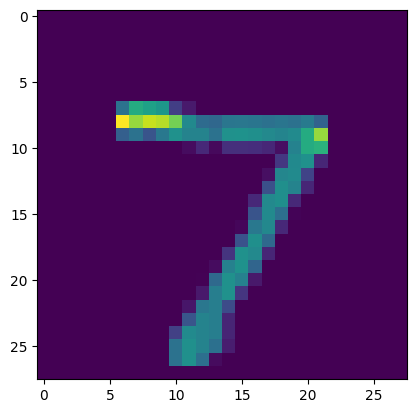

In [234]:
plt.imshow(x_test[0])

In [235]:
print(np.argmax(predictions[128]))

8


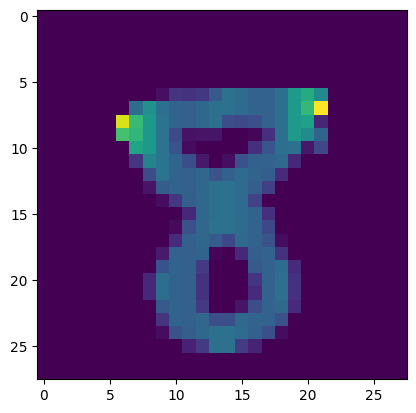

In [236]:
plt.imshow(x_test[128])

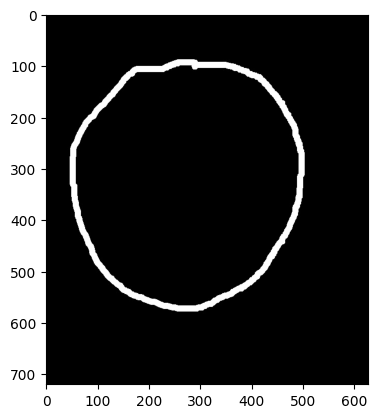

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
0


In [240]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
pat=['/0.png']
for i in pat:
    img=cv2.imread(i)
    plt.imshow(img)
    plt.show()

    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)
    newing=tf.keras.utils.normalize(resized,axis=1)
    newing=np.array(newing).reshape(-1,IMG_SIZE,IMG_SIZE,1)
    predictions=model.predict(newing)
    print(np.argmax(predictions))

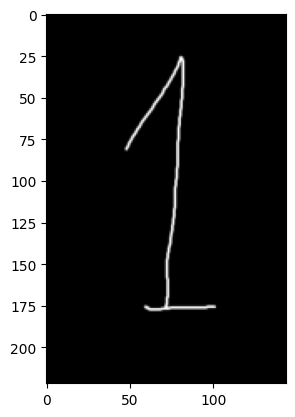

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1


In [241]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
pat=['/1.png']
for i in pat:
    img=cv2.imread(i)
    plt.imshow(img)
    plt.show()

    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)
    newing=tf.keras.utils.normalize(resized,axis=1)
    newing=np.array(newing).reshape(-1,IMG_SIZE,IMG_SIZE,1)
    predictions=model.predict(newing)
    print(np.argmax(predictions))

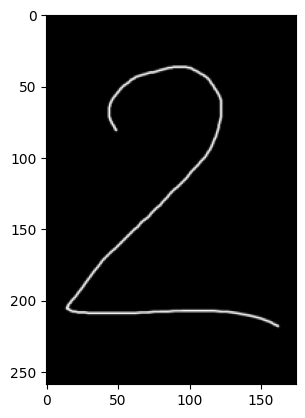

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
2


In [242]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
pat=['/2.png']
for i in pat:
    img=cv2.imread(i)
    plt.imshow(img)
    plt.show()

    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)
    newing=tf.keras.utils.normalize(resized,axis=1)
    newing=np.array(newing).reshape(-1,IMG_SIZE,IMG_SIZE,1)
    predictions=model.predict(newing)
    print(np.argmax(predictions))

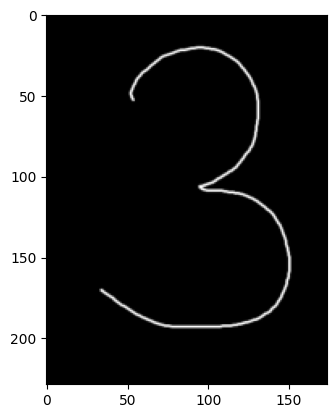

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3


In [243]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
pat=['/3.png']
for i in pat:
    img=cv2.imread(i)
    plt.imshow(img)
    plt.show()

    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)
    newing=tf.keras.utils.normalize(resized,axis=1)
    newing=np.array(newing).reshape(-1,IMG_SIZE,IMG_SIZE,1)
    predictions=model.predict(newing)
    print(np.argmax(predictions))

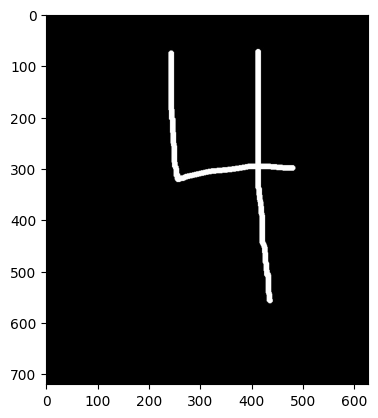

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
4


In [248]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
pat=['/4.png']
for i in pat:
    img=cv2.imread(i)
    plt.imshow(img)
    plt.show()

    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)
    newing=tf.keras.utils.normalize(resized,axis=1)
    newing=np.array(newing).reshape(-1,IMG_SIZE,IMG_SIZE,1)
    predictions=model.predict(newing)
    print(np.argmax(predictions))

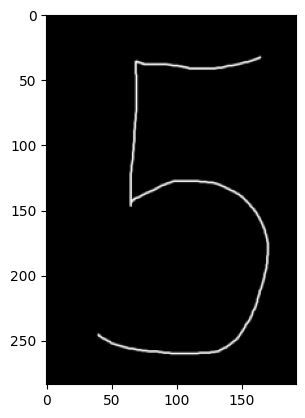

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
5


In [249]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
pat=['/5.png']
for i in pat:
    img=cv2.imread(i)
    plt.imshow(img)
    plt.show()

    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)
    newing=tf.keras.utils.normalize(resized,axis=1)
    newing=np.array(newing).reshape(-1,IMG_SIZE,IMG_SIZE,1)
    predictions=model.predict(newing)
    print(np.argmax(predictions))

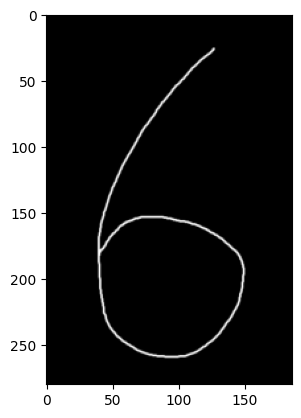

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6


In [250]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
pat=['/6.png']
for i in pat:
    img=cv2.imread(i)
    plt.imshow(img)
    plt.show()

    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)
    newing=tf.keras.utils.normalize(resized,axis=1)
    newing=np.array(newing).reshape(-1,IMG_SIZE,IMG_SIZE,1)
    predictions=model.predict(newing)
    print(np.argmax(predictions))

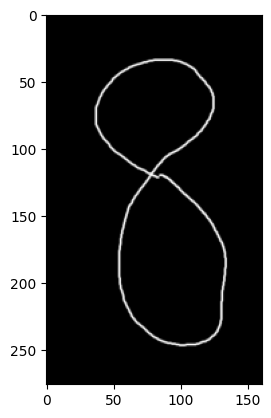

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
8


In [251]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
pat=['/8.png']
for i in pat:
    img=cv2.imread(i)
    plt.imshow(img)
    plt.show()

    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)
    newing=tf.keras.utils.normalize(resized,axis=1)
    newing=np.array(newing).reshape(-1,IMG_SIZE,IMG_SIZE,1)
    predictions=model.predict(newing)
    print(np.argmax(predictions))